In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lo primero, leemos el dataframe
df = pd.read_csv('df_all_rs.csv')
df

Unnamed: 0  index GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  \
0               0      0    2004-04-14  20301188    1610612746   
1               1      1    2004-04-14  20301184    1610612759   
2               2      2    2004-04-14  20301181    1610612754   
3               3      3    2004-04-14  20301177    1610612764   
4               4      4    2004-04-14  20301179    1610612752   
...           ...    ...           ...       ...           ...   
19393       19393  19393    2018-10-17  21800011    1610612758   
19394       19394  19394    2018-10-17  21800012    1610612746   
19395       19395  19395    2018-10-17  21800013    1610612756   
19396       19396  19396    2018-10-16  21800001    1610612738   
19397       19397  19397    2018-10-16  21800002    1610612744   

       VISITOR_TEAM_ID  SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  ...  \
0           1610612760    2003    1610612746      87.0        0.423  ...   
1           1610612743    2003    1610612759      93.0        0.424  ...   
2           1610612741    2003    1610612754     101.0        0.420  ...   
3           1610612740    2003    1610612764      78.0        0.375  ...   
4           1610612739    2003    1610612752      90.0        0.481  ...   
...                ...     ...           ...       ...          ...  ...   
19393       1610612762    2018    1610612758     117.0        0.516  ...   
19394       1610612743    2018    1610612746      98.0        0.398  ...   
19395       1610612742    2018    1610612756     121.0        0.543  ...   
19396       1610612755    2018    1610612738     105.0        0.433  ...   
19397       1610612760    2018    1610612744     108.0        0.442  ...   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
0          17.0      37.0    1610612760     118.0        0.542        1.000   
1          15.0      58.0    1610612743      67.0        0.325        0.611   
2          24.0      58.0    1610612741      96.0        0.420        0.667   
3          13.0      39.0    1610612740      94.0        0.451        0.600   
4          13.0      42.0    1610612739     100.0        0.488        0.900   
...         ...       ...           ...       ...          ...          ...   
19393      17.0      37.0    1610612762     123.0        0.519        0.737   
19394      21.0      47.0    1610612743     107.0        0.379        0.786   
19395      35.0      44.0    1610612742     100.0        0.432        0.700   
19396      21.0      55.0    1610612755      87.0        0.391        0.609   
19397      28.0      58.0    1610612760     100.0        0.363        0.649   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
0             0.375      32.0      34.0               0  
1             0.222      11.0      47.0               1  
2             0.357      20.0      41.0               1  
3             0.364      24.0      48.0               0  
4             0.364      22.0      40.0               0  
...             ...       ...       ...             ...  
19393         0.481      21.0      44.0               0  
19394         0.333      20.0      56.0               0  
19395         0.303      28.0      38.0               1  
19396         0.192      18.0      47.0               1  
19397         0.270      21.0      45.0               1  

[19398 rows x 22 columns]

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('index', axis=1)

<AxesSubplot:>

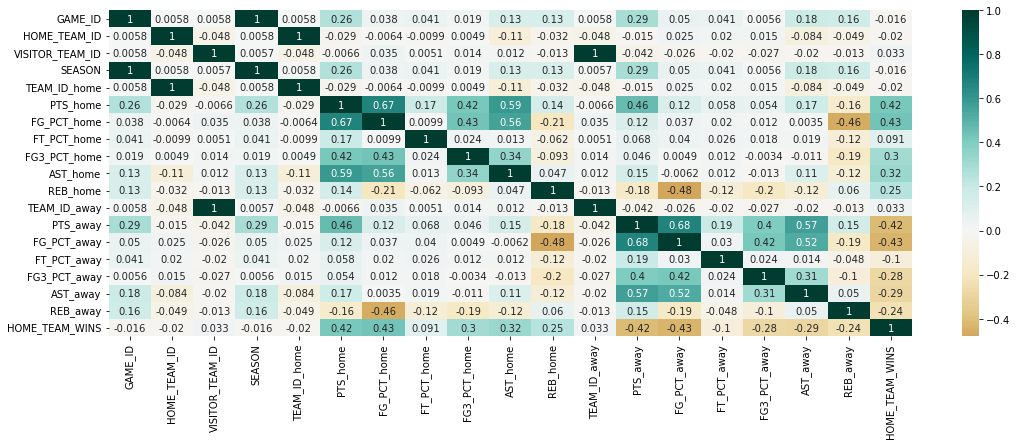

In [4]:
df_corr = df.corr()
plt.figure(figsize=(18,6))
sns.heatmap(df_corr, annot=True, cmap='BrBG', center=0)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [6]:
target = df['HOME_TEAM_WINS']
data = df[['FG_PCT_home', 'FG_PCT_away', 'FG3_PCT_home', 'FG3_PCT_away']]

In [7]:
data.shape

(19398, 4)

In [8]:
target.shape

(19398,)

In [9]:
def evaluate(estimator, data, target):

    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)
    probs = estimator.predict_proba(X_test)[:,1]

    # plotear curva roc
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    f, ax = plt.subplots(1,1)
    f.set_size_inches(8,7)
    ax.plot(fpr,tpr)
    ax.plot([0,1], [0,1], c='grey')

    print(f'acc: {accuracy_score(y_test, y_hat):.3} \
    recall: {recall_score(y_test, y_hat):.3} \
    precision:{precision_score(y_test, y_hat):.3} \
    f1:{f1_score(y_test, y_hat):.3} \
    auc:{roc_auc_score(y_test, probs):.3}')

acc: 0.808     recall: 0.867     precision:0.815     f1:0.84     auc:0.89


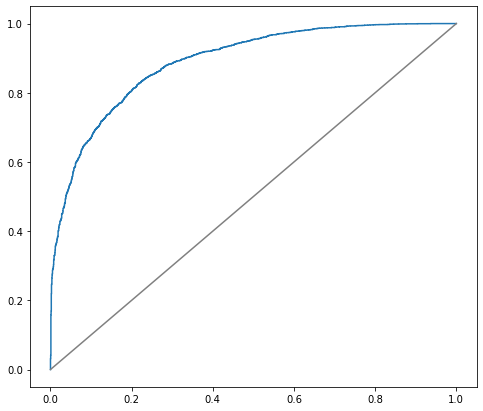

In [10]:
logR = LogisticRegression()
evaluate(logR, data, target)

In [11]:
def evaluar_metricas(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    metrics_results.loc[name] = [mse,rmse,mae]

In [12]:
metrics_results = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

In [13]:
lr = LinearRegression()
kn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
mlpr = MLPRegressor()
logR = LogisticRegression()

evaluar_metricas(lr, data, target, 'lr')
evaluar_metricas(kn, data, target, 'kn')
evaluar_metricas(dt, data, target, 'dt')
evaluar_metricas(rf, data, target, 'rf')
evaluar_metricas(mlpr, data, target, 'mlpr')
evaluar_metricas(logR, data, target, 'logR')

metrics_results.style.highlight_min(color='lightgreen', axis=0)

In [14]:
# A priori parace que los algoritmos que menos error dan son mlpr y logR
# Esto es una primera prueba, no tenemos los datos normalizados si quiera
# Asi que lo primero que vamos a hacer es normalizar

In [15]:
data_copy = data.copy()
normalized_data = (data_copy - data_copy.mean()) / data_copy.std()

In [16]:
# Volvemos a evaluar, pero ahora con los datos normalizados
evaluar_metricas(lr, normalized_data, target, 'lr_normalized')
evaluar_metricas(kn, normalized_data, target, 'kn_normalized')
evaluar_metricas(dt, normalized_data, target, 'dt_normalized')
evaluar_metricas(rf, normalized_data, target, 'rf_normalized')
evaluar_metricas(mlpr, normalized_data, target, 'mlpr_normalized')
evaluar_metricas(logR, normalized_data, target, 'logR_normalized')

metrics_results

MSE      RMSE       MAE
lr               0.140476  0.374801  0.317790
kn               0.158037  0.397539  0.265897
dt               0.260412  0.510306  0.260412
rf               0.148943  0.385932  0.271402
mlpr             0.137008  0.370146  0.294105
logR             0.194021  0.440478  0.194021
lr_normalized    0.144878  0.380628  0.323927
kn_normalized    0.157320  0.396635  0.262722
dt_normalized    0.273402  0.522879  0.273402
rf_normalized    0.145097  0.380916  0.271522
mlpr_normalized  0.128990  0.359152  0.257135
logR_normalized  0.174639  0.417899  0.174639

In [17]:
metrics_results.style.highlight_min(color='lightgreen', axis=0)

In [18]:
# Con los datos normalizados vemos que el algoritmo mlpr sigue siendo el que menos error tiene
# Antes de decidirnos del todo por un algoritmo, vamos a a "toquetear" un poco cada uno,
# jugar con sus parametros y demas

In [19]:
# Vamos a empezar con Kneighbors
# Para ello modificamos un poco la funcion que teniamos antes para evaluar, para que nos guarde los resultados
# en un dataframe distinto, uno solo para kn

# kn

In [20]:
kn_metrics = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas_kn(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    kn_metrics.loc[name] = [mse,rmse,mae]

In [21]:
#kn
for i in range(1, 50):
    kn = KNeighborsRegressor(n_neighbors=i)
    evaluar_metricas_kn(kn, normalized_data, target, 'kn_normalized_'+str(i))
    
kn_metrics.style.highlight_min(color='lightgreen', axis=0)

### Conclusión kn: 
#### n_neighbors es 29(MSE y RMSE)
#### n_neighbors es 2(MAE)

# dt

In [22]:
dt_metrics = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas_dt(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    dt_metrics.loc[name] = [mse,rmse,mae]

In [23]:
#dt
for i in range(1, 50):
    for j in range(1,10):
        dt = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        evaluar_metricas_dt(dt, normalized_data, target, 'dt_normalized_'+str(i)+str(j))
        j += 1
    i += 1
    
dt_metrics.style.highlight_min(color='lightgreen', axis=0)

### Conclusión dt: 
#### max_depth=6 y min_samples_leaf=2(MSE y RMSE)
#### max_depth=25 y min_samples_leaf=3(MAE)

# rf

In [26]:
rf_metrics = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas_rf(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    rf_metrics.loc[name] = [mse,rmse,mae]

In [27]:
#rf
for k in range(1,30):
    for i in range(1, 50):
        for j in range(1,10):
            rf = RandomForestRegressor(n_estimators=k, max_depth=i, min_samples_leaf=j)
            evaluar_metricas_rf(rf, normalized_data, target, 'rf_normalized_'+str(k)+str(i)+str(j))
            j += 1
        i += 1
    k += 1
rf_metrics.style.highlight_min(color='lightgreen', axis=0)

### Conclusión rf:
#### minimo cuando: rf_normalized_16417 -> n_estimators=16, max_depth=41, min_samples_leaf=7

# logR

In [ ]:
logR_metrics = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas_logR(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    logR_metrics.loc[name] = [mse,rmse,mae]

In [ ]:
#logR
for k in range(1,30):
    for i in range(1, 50):
        for j in range(1,10):
            logR = logR = LogisticRegression()
            evaluar_metricas_logR(logR, normalized_data, target, 'logR_normalized_'+str(k)+str(i)+str(j))
            j += 1
        i += 1
    k += 1
logR_metrics.style.highlight_min(color='lightgreen', axis=0)

### Conclusión logR:
#### minimo cuando:

# mlpr

In [ ]:
mlpr_metrics = pd.DataFrame(columns=['MSE','RMSE', "MAE"])

def evaluar_metricas_mlpr(estimator, data, target, name):
    
    X_train, X_test, y_train, y_test = train_test_split(data,target)

    estimator.fit(X_train, y_train)
    y_hat = estimator.predict(X_test)

    errors = y_test - y_hat
    mae = np.mean(np.abs(errors))
    mse = np.mean(errors ** 2)
    rmse = np.sqrt(mse)
    
    mlpr_metrics.loc[name] = [mse,rmse,mae]

In [ ]:
#mlpr
for k in range(1,30):
    for i in range(1, 50):
        for j in range(1,10):
            mlpr = MLPRegressor()
            evaluar_metricas_mlpr(mlpr, normalized_data, target, 'mlpr_normalized_'+str(k)+str(i)+str(j))
            j += 1
        i += 1
    k += 1
mlpr_metrics.style.highlight_min(color='lightgreen', axis=0)

### Conclusión mlpr:
#### minimo cuando: